# SysArmy - Serie histórica 2014.02 - 2021.02


## 1. Carga y normalización de datos de los diferentes datasets

###  1.1. Definición de metadata por dataset que define la forma de unir los diferentes conjuntos de datos

In [1]:
#%load_ext nb_black

csv_url = "https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/{:04d}.{:02d}.csv"

"""

Salario Mínimo en Argentina
referencia: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina

1 de septiembre de 2014	4400 ARS
1 de enero de 2015	4716 ARS
1 de agosto de 2015	5588 ARS
1 de enero de 2016	6060 ARS
1 de junio de 2016	6810 ARS
1 de septiembre de 2016	7560 ARS
1 de enero de 2017	8060 ARS
1 de julio de 2017	8860 ARS
1 de enero de 2018	9500 ARS
1 de julio de 2018	10000 ARS
1 de septiembre de 2018	10700 ARS
1 de diciembre de 2018	11300 ARS
1 de marzo de 2019	11900 ARS
1 de marzo de 2019	12500 ARS (as of Aug)
1 de febrero de 2020	16875 ARS (as of Oct)
"""

datasets_metadata = [
    # salaries are normalized to brute
    # dst = ['salary', 'salary_type' 'location', 'age', 'yoe', 'yip', 'role', 'stack']
    {
        "year": 2016,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2016-08-01",
        "minimum_salary": 6810,
        "src": [
            "Salario mensual (en tu moneda local)",
            "Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Soy",
            "Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2017,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2017-02-01",
        "minimum_salary": 8060,
        "src": [
            "Salario mensual (en tu moneda local)",
            "Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Soy",
            "Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2017,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2017-09-01",
        "minimum_salary": 8860,
        "src": [
            "Salario mensual (en tu moneda local)",
            "¿Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2018,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2018-03-01",
        "minimum_salary": 9500,
        "src": [
            "Salario mensual (en tu moneda local)",
            "¿Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2018,
        "part": 2,
        "skiprows": 3,
        "publish_date": "2018-09-04",
        "minimum_salary": 10700,
        "src": [
            "Salario mensual (en tu moneda local)",
            "¿Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2019,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2019-02-15",
        "minimum_salary": 11300,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2019,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2019-08-15",
        "minimum_salary": 12500,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2020,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2020-02-02",
        "minimum_salary": 16875,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2020,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2020-08-15",
        "minimum_salary": 16875,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2021,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2021-02-15",
        "minimum_salary": 20587,
        "src": [
            "Salario mensual o retiro BRUTO (en tu moneda local)",
            "Salario mensual o retiro BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2021,
       "part": 2,
        "skiprows": 0,
        "publish_date": "2021-08-23",   
        "minimum_salary": 27216 ,
        "src": [
            "Salario mensual o retiro BRUTO (en tu moneda local)",
            "Salario mensual o retiro BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
           "¿Qué tan conforme estás con tu sueldo?",
        ],
    }

]

import datetime

final_publish_date = datetime.date(2021, 9, 13)



    





### 1.2. Iteramos los metadatos por dataset y cargamos los valores del repositorio

In [2]:
import pandas as pd
import io
import requests
from time import sleep

raw_dataframes = []
for dataset in datasets_metadata:
    source = requests.get(csv_url.format(dataset["year"], dataset["part"])).content
    print(csv_url.format(dataset["year"], dataset["part"]))
    raw_dataframes.append(
        pd.read_csv(
            io.StringIO(source.decode("utf-8")),
            skiprows=dataset["skiprows"],
            thousands=".",
            decimal=",",
        )
    )
    sleep(2)  ## avoid rate limits

https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2016.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2017.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2017.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2018.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2018.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2019.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2019.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2020.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2020.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2021.01.csv
https://raw.githubus

In [4]:
!pip install funpymodeling
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from dash import dash_table

### 1.3. Combinamos los diferentes datasets en forma de Union en un nuevo Dataframe

In [5]:
import numpy as np

dst_cols = [
    "salary",
    "salary_type",
    "location",
    "age",
    "yoe",  # years of experience
    "yip",  # years in position
    "role",
    "gender",
    "acquiescence",
]

dataframes = []
for i, dataset in enumerate(datasets_metadata):
    print(dataset)
    df = pd.DataFrame(raw_dataframes[i][dataset["src"]].values, columns=dst_cols)
    df["part"] = dataset["part"]
    df["publish_date"] = pd.to_datetime(dataset["publish_date"])
    dataframes.append(df)

combined_dataframe = pd.concat(dataframes)
combined_dataframe

{'year': 2016, 'part': 2, 'skiprows': 0, 'publish_date': '2016-08-01', 'minimum_salary': 6810, 'src': ['Salario mensual (en tu moneda local)', 'Bruto o neto?', 'Argentina', 'Tengo', 'Años de experiencia', 'Años en el puesto actual', 'Trabajo de', 'Soy', 'Qué tan conforme estás con tu sueldo?']}
{'year': 2017, 'part': 1, 'skiprows': 0, 'publish_date': '2017-02-01', 'minimum_salary': 8060, 'src': ['Salario mensual (en tu moneda local)', 'Bruto o neto?', 'Argentina', 'Tengo', 'Años de experiencia', 'Años en el puesto actual', 'Trabajo de', 'Soy', 'Qué tan conforme estás con tu sueldo?']}
{'year': 2017, 'part': 2, 'skiprows': 0, 'publish_date': '2017-09-01', 'minimum_salary': 8860, 'src': ['Salario mensual (en tu moneda local)', '¿Bruto o neto?', 'Argentina', 'Tengo', 'Años de experiencia', 'Años en el puesto actual', 'Trabajo de', 'Me identifico', '¿Qué tan conforme estás con tu sueldo?']}
{'year': 2018, 'part': 1, 'skiprows': 0, 'publish_date': '2018-03-01', 'minimum_salary': 9500, 'src'

,salary,salary_type,location,age,yoe,yip,role,gender,acquiescence,part,publish_date
0,27000,Neto,Ciudad Autónoma de Buenos Aires,27 - 30,10+,2 - 3,SysAdmin / DevOps,Hombre,2,2,2016-08-01
1,22000,Neto,Ciudad Autónoma de Buenos Aires,24 - 26,3 - 5,Menos de un año,Developer,Hombre,3,2,2016-08-01
2,34900,Bruto,Ciudad Autónoma de Buenos Aires,37 - 40,10+,Menos de un año,SysAdmin / DevOps,Hombre,5,2,2016-08-01
3,30000,Bruto,Santa Fe,41 - 45,10+,5 - 6,Infosec,Hombre,4,2,2016-08-01
4,42000,Neto,Córdoba,37 - 40,10+,10+,SysAdmin / DevOps,Hombre,3,2,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...
6405,250000,250000,Ciudad Autónoma de Buenos Aires,39,15,6,Developer,Varón Cis,2,2,2021-08-23
6406,197500,197500,Neuquén,42,10,5,Project Manager,Varón Cis,2,2,2021-08-23
6407,56400,56400,Ciudad Autónoma de Buenos Aires,28,4,4,Consultant,Mujer Cis,2,2,2021-08-23
6408,234760,234760,Ciudad Autónoma de Buenos Aires,51,15,0,Consultant,Mujer Cis,3,2,2021-08-23


### 1.4. Normalizamos columnas del Dataframe

In [6]:
import re
import sys

dataframe = combined_dataframe.copy()

# normalize salary column
## cast to float the salary column, some datasets get wrongly parsed due to crappy user input
dataframe["salary"] = pd.to_numeric(dataframe['salary'], errors='coerce').astype(float)
mask = dataframe["salary_type"].astype(str).str.contains("Neto")
net_factor = np.array([1.0] * len(dataframe))
## scales up net salary into brute, given Argentina's social security contributions
net_factor[mask] = 1 / 0.83
dataframe["salary"] = net_factor * dataframe["salary"]
dataframe.drop(["salary_type"], axis=1, inplace=True)

# the first two dataframes do not have any gender information
mask = dataframe.eval('publish_date in ["2015-01-01", "2015-09-01"]')
dataframe.loc[mask, "gender"] = None
dataframe.loc[mask, "acquiescence"] = 0

# normalize age column
dataframe["age"] = dataframe["age"].astype(str)

dataframe

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\730873034.py:17: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  mask = dataframe.eval('publish_date in ["2015-01-01", "2015-09-01"]')


,salary,location,age,yoe,yip,role,gender,acquiescence,part,publish_date
0,32530.120482,Ciudad Autónoma de Buenos Aires,27 - 30,10+,2 - 3,SysAdmin / DevOps,Hombre,2,2,2016-08-01
1,26506.024096,Ciudad Autónoma de Buenos Aires,24 - 26,3 - 5,Menos de un año,Developer,Hombre,3,2,2016-08-01
2,34900.000000,Ciudad Autónoma de Buenos Aires,37 - 40,10+,Menos de un año,SysAdmin / DevOps,Hombre,5,2,2016-08-01
3,30000.000000,Santa Fe,41 - 45,10+,5 - 6,Infosec,Hombre,4,2,2016-08-01
4,50602.409639,Córdoba,37 - 40,10+,10+,SysAdmin / DevOps,Hombre,3,2,2016-08-01
...,...,...,...,...,...,...,...,...,...,...
6405,250000.000000,Ciudad Autónoma de Buenos Aires,39,15,6,Developer,Varón Cis,2,2,2021-08-23
6406,197500.000000,Neuquén,42,10,5,Project Manager,Varón Cis,2,2,2021-08-23
6407,56400.000000,Ciudad Autónoma de Buenos Aires,28,4,4,Consultant,Mujer Cis,2,2,2021-08-23
6408,234760.000000,Ciudad Autónoma de Buenos Aires,51,15,0,Consultant,Mujer Cis,3,2,2021-08-23


### 1.5. Eliminamos outliers

Para detectar correctamente outliers en la serie histórica, lo haremos en función de la columna salary, teniendo en cuenta el desplazamiento de estos valores debido a la inflación.  Para lograrlo, utilizaremos el método IQR, aplicándolo por muestra de manera aislada.

In [7]:
def remove_outlier(df_in, col_name, iqr_factor=1.5):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


clean_dataframe = []
for dataset in datasets_metadata:
    publish_date = dataset["publish_date"]
    minimum_salary = dataset["minimum_salary"]
    df = dataframe.query("publish_date == @publish_date")
    # apply the IQR method with coefficient 3.5
    df = remove_outlier(df, "salary", 3.5)
    # also remove entries with salary under the minimum salary for that period
    df = df.query("salary >= @minimum_salary/2.0")
    clean_dataframe.append(df)


# remove salaries under Salario Mínimo: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina
dataframe = pd.concat(clean_dataframe)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\539003285.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = dataframe.query("publish_date == @publish_date")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\539003285.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = dataframe.query("publish_date == @publish_date")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\539003285.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, 

In [8]:
gender_txs = {
    'Hombre Cis': '(hombre|simplemente hombre|varón cis|varón|varon|masculino|varón cis heterosexual|.*varón cis.*|.*varon y punto|macho alfa|.*soy varon|.*helic[oó]ptero|.*apache|machote|optimus prime|macho|sexo masculino|peronista|humano masculino|velociraptor|.*pekemen|.*hijo de puta|.*gargola|tortuga|robot mutante|unicornio|.*poste de luz|dinosaurio|hormiga|.*interplanetario|.*ventilador de techo|.*persona|herero|soy hombre.*|ser humano heterosexual|heterosexual|homosexual|gay)',
    'Mujer Cis': '(mujer cis|mujer|soy mujer)',
    'Otros': '(otros)',
    'Hombre Trans': 'varón trans',
    'Mujer Trans': '(mujer trans|travesti|femenino pero mi DNI dice masculino|trans queer)',
    'Prefiero No Decir': '(prefiero no decir|.*les importa\?|completamente irrelevante|.*pelotude[zs].*|basta|No entiendo|.*preguntas de mierda|.*nada que ver|.*romper los huevos|.*boludeces|no tiene sentido esto|wtf|que puta te importa|no es importante|es necesario esto|dejen de romper|dejen de preguntar|que pelotudés|no interesa|.*esta pregunta pelotuda|ns/nc|.*boludez|.*que mierda es esto|no tengo ni idea|nose cual elegir|.*que sea para pelotudos|.*no se que poner|\?\?\?|.*crear etiquetas|.*me marearon|.*me visto de mujer|^m$|Otre|.*idioma inclusivo|y el gay|.*pregunta mas rebuscada|no tengo idea|.*carne de blockbuster|no idea|Todo OK con la diversidad.*)',
    'No Binarie': 'no binarie',
    'Agénero': 'agénero',
}

for label, regex in gender_txs.items():
    ix = dataframe.gender.str.match(regex, case=False,na=False) 
    dataframe.loc[ix, 'me_id_extra'] = label

dataframe.me_id_extra.value_counts() / len(dataframe)

<>:7: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\?'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\923292308.py:7: SyntaxWarning: invalid escape sequence '\?'
  'Prefiero No Decir': '(prefiero no decir|.*les importa\?|completamente irrelevante|.*pelotude[zs].*|basta|No entiendo|.*preguntas de mierda|.*nada que ver|.*romper los huevos|.*boludeces|no tiene sentido esto|wtf|que puta te importa|no es importante|es necesario esto|dejen de romper|dejen de preguntar|que pelotudés|no interesa|.*esta pregunta pelotuda|ns/nc|.*boludez|.*que mierda es esto|no tengo ni idea|nose cual elegir|.*que sea para pelotudos|.*no se que poner|\?\?\?|.*crear etiquetas|.*me marearon|.*me visto de mujer|^m$|Otre|.*idioma inclusivo|y el gay|.*pregunta mas rebuscada|no tengo idea|.*carne de blockbuster|no idea|Todo OK con la diversidad.*)',


me_id_extra
Hombre Cis           0.852211
Mujer Cis            0.130549
Prefiero No Decir    0.010770
Otros                0.002662
No Binarie           0.001372
Mujer Trans          0.000450
Hombre Trans         0.000328
Agénero              0.000061
Name: count, dtype: float64

In [9]:
sufficient_data = ['Hombre Cis', 'Mujer Cis', 'Prefiero No Decir', 'Otros', 'No Binarie']

dataframe.loc[~dataframe.me_id_extra.isin(sufficient_data), 'me_id_extra'] = 'Otros'

## 2. Análisis de resultados

### 2.1. Plot de histogramas para verificar estado de sanitización y normalización de datos

In [10]:
charts = {}


def to_rechart(df, max=0):
    """
  if max is set, groups the exceeded rows into 'Otros' column, summing values
  """
    if max != 0:
        # df = df.sort_values(by, ascending=False)
        others = df[max:].sum()
        df = df[:max]
        df.loc["Otros"] = others
    return {
        "data": [
            {"name": str(name), **(data if isinstance(data, dict) else {"value": data})}
            for name, data in df.T.to_dict().items()
        ],
    }

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\810461040.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax[i].text(40, 0.025, "$\mu=%.2f,\ \sigma=%.2f,\ n=%d$" % (mu, sigma, len(s)))


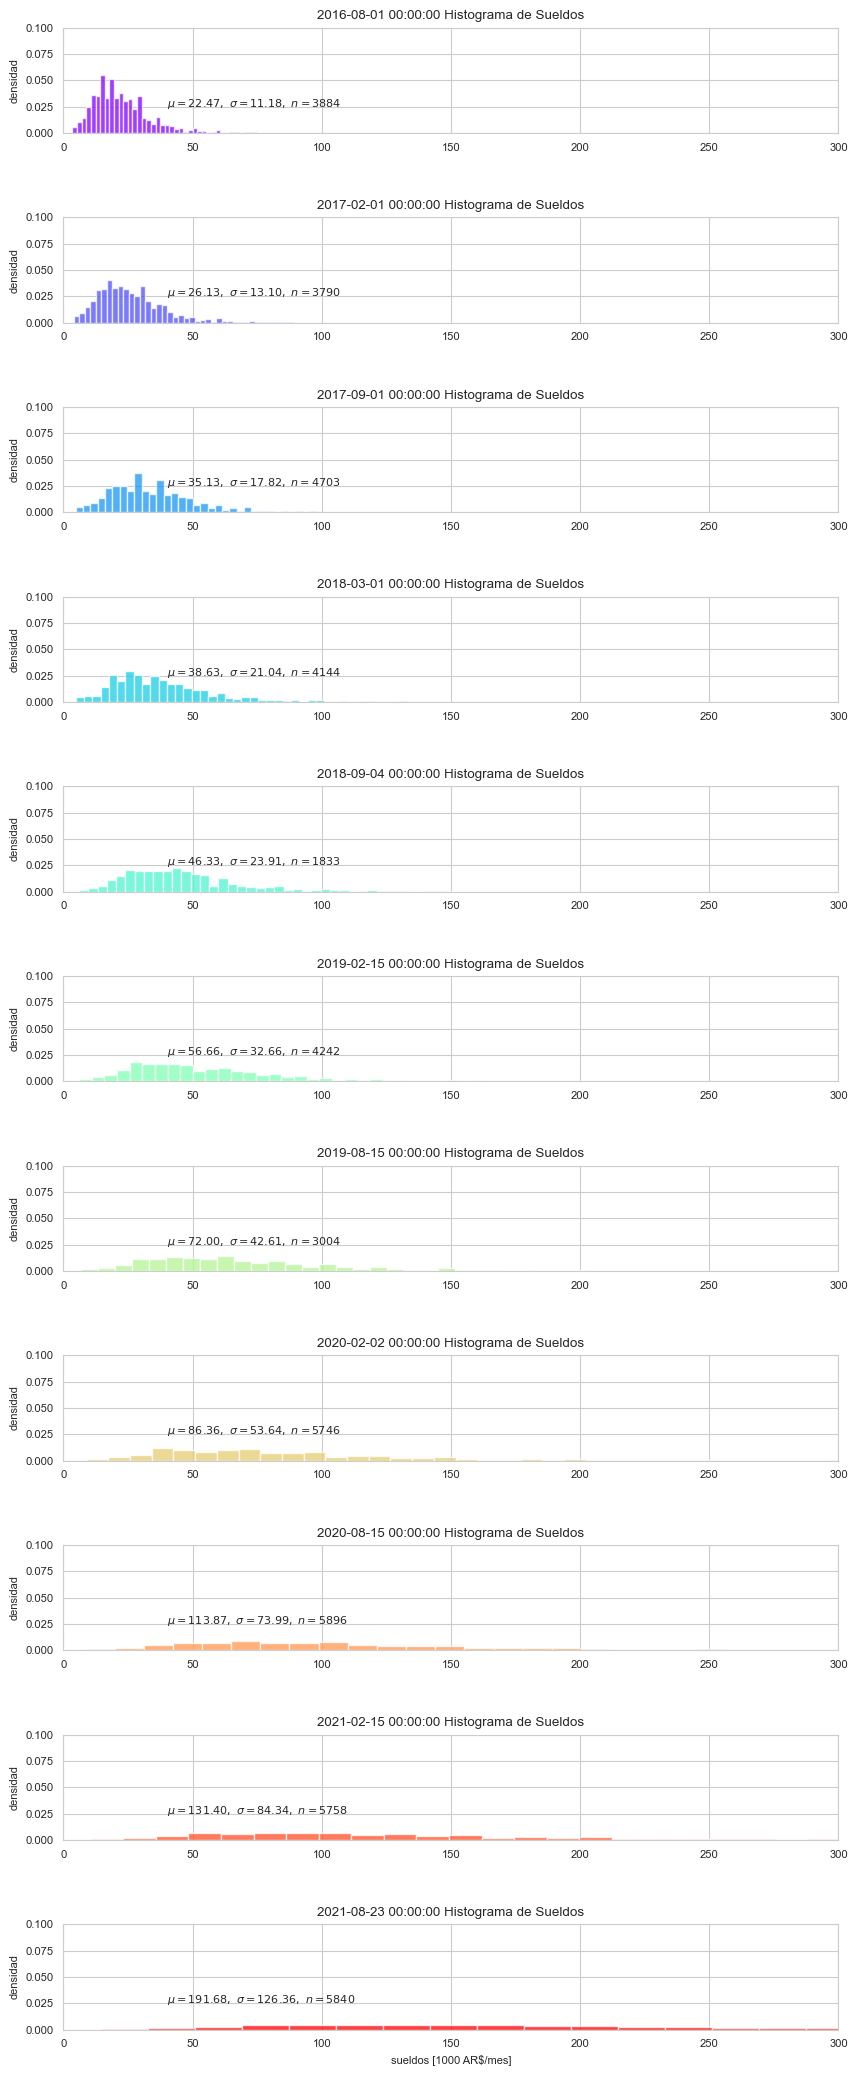

None

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm

publish_dates = dataframe.publish_date.unique()
# generate a list of colors by period for easy visualization on next figures
colors = cm.rainbow(np.linspace(0, 1, len(publish_dates)))

plt.rcParams.update({"figure.figsize": (10.0, 26.0), "font.size": 8})
fig, ax = plt.subplots(len(publish_dates), 1)
for i, publish_date in enumerate(publish_dates):
    salary_series = dataframe.query("publish_date == @publish_date")["salary"]
    s = salary_series.apply(lambda x: float("{0:.2f}".format(round(x / 1000, 1))))
    mu, sigma = np.mean(s), np.std(s)

    n, bins, patches = ax[i].hist(s, bins=40, density=True, alpha=0.75, color=colors[i])
    ax[i].set_ylabel("densidad")
    ax[i].set_title(str(publish_date) + " Histograma de Sueldos")
    ax[i].text(40, 0.025, "$\mu=%.2f,\ \sigma=%.2f,\ n=%d$" % (mu, sigma, len(s)))
    ax[i].axis([0, 300, 0, 0.1])
    ax[i].grid(True)
ax[len(publish_dates) - 1].set_xlabel("sueldos [1000 AR$/mes]")

plt.subplots_adjust(hspace=0.8)
fig.canvas.draw()
display(plt.show())
plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})

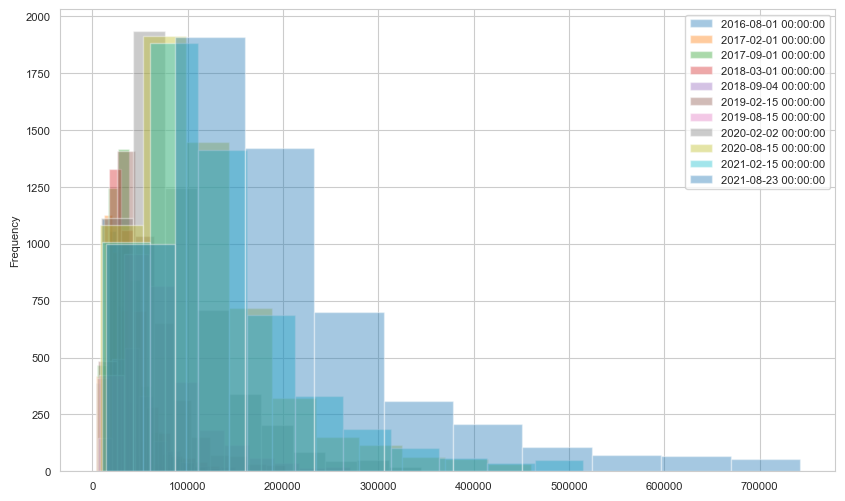

In [12]:
# superposición de histogramas
dataframe.groupby("publish_date")["salary"].plot(kind="hist", alpha=0.4)
plt.legend()

### 2.2. Plot de algunas mediciones históricas

#### 2.2.1. Salarios

<Axes: xlabel='publish_date'>

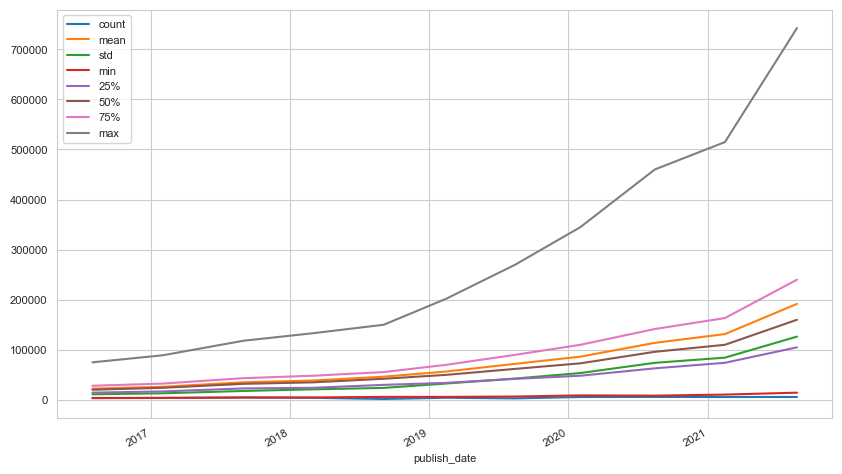

In [13]:
dataframe.groupby("publish_date").salary.describe().plot(kind="line")

me_id_extra,Hombre Cis,Mujer Cis,No Binarie,Otros,Prefiero No Decir
publish_date,,,,,
2016-08-01,2.977703,2.706081,0.000000,0.000000,0.000000
2017-02-01,2.448216,2.314869,0.000000,0.000000,0.000000
2017-09-01,2.552419,2.427350,0.000000,2.315789,0.000000
2018-03-01,2.523168,2.312830,0.000000,2.142857,0.000000
2018-09-04,2.586272,2.451883,0.000000,1.833333,0.000000
2019-02-15,2.548945,2.531549,0.000000,2.333333,0.000000
2019-08-15,2.651988,2.595745,0.000000,2.800000,0.000000
2020-02-02,2.550663,2.485924,0.000000,2.791667,0.000000
2020-08-15,2.607989,2.624009,0.000000,2.516129,0.000000


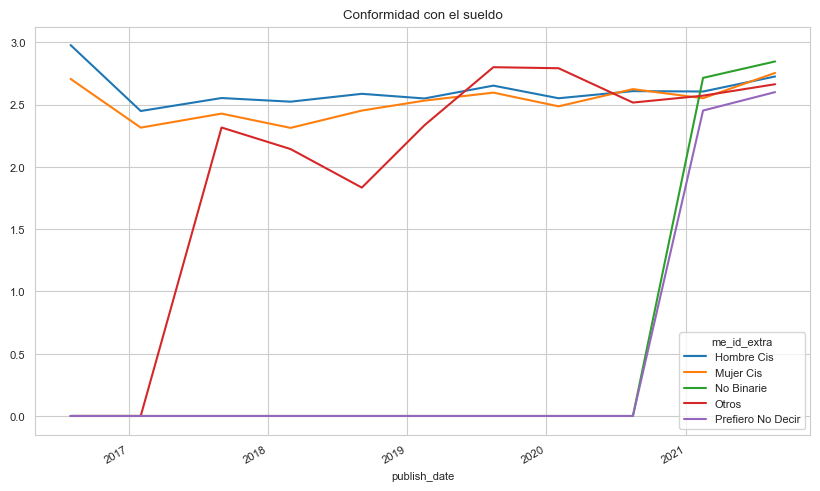

In [14]:
dataframe.acquiescence = pd.to_numeric(dataframe.acquiescence)
df = (
    dataframe.groupby(["publish_date", "me_id_extra"])
    .acquiescence.mean()
    .unstack("me_id_extra")
    .fillna(0)
)
df.plot(kind="line", title="Conformidad con el sueldo")
charts["historic_acquiescence_means"] = to_rechart(df)
display(df)

In [15]:
import io
import requests
import json
import datetime

%matplotlib inline


# https://www.bloomberg.com/markets/api/bulk-time-series/price/USDARS%3ACUR?timeFrame=5_YEAR
url = "https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/currency-2021.02.json"
source = requests.get(url).content
data = json.loads(source)





df_currency = pd.DataFrame(data[0]["price"]).rename(
    index=str, columns={"dateTime": "date"}
)
df_currency.date = pd.to_datetime(df_currency.date)

plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})

delta = np.timedelta64(5, "D")
dates = dataframe.publish_date.unique()

currencies = [
    df_currency.query(
        '(date >= "{}") & (date <= "{}")'.format(date - delta, date + delta)
    ).median()
    for date in dates
]
display(currencies)

salary_means = [
    dataframe.query("publish_date == @date").salary.mean() for date in dates
]

us_salary_means = [
    float(salary_mean / currencies[i]) for i, salary_mean in enumerate(salary_means)
]

years = [period["year"] for period in datasets_metadata]
parts = [period["part"] for period in datasets_metadata]

salary_medians = [
    dataframe.query("publish_date == @date").salary.median() for date in dates
]

us_salary_medians = [
    float(salary_median / currencies[i])
    for i, salary_median in enumerate(salary_medians)
]

plt.xlabel("fecha")
plt.ylabel("1US\$ [AR\$]")
plt.plot(
    dates,
    currencies,
    "+",
    label="Media del valor de cambio de la moneda para cada período, sobre una ventana de 30 días",
    ls="-",
    c="b",
)
plt.plot(
    df_currency.date,
    df_currency.value,
    label="Valor intradiario del cambio de la moneda",
    ls="-",
    c="g",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})
plt.xlabel("Fecha")
plt.ylabel("Media salarial [US\$]")
plt.plot(
    dates,
    us_salary_means,
    "+",
    label="Media salarial por cada período en dólares",
    ls="-",
    c="r",
)
plt.plot(
    dates,
    us_salary_medians,
    "+",
    label="Mediana salarial por cada período en dólares",
    ls="-",
    c="g",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

<>:57: SyntaxWarning: invalid escape sequence '\$'
<>:78: SyntaxWarning: invalid escape sequence '\$'
<>:57: SyntaxWarning: invalid escape sequence '\$'
<>:78: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\2286862859.py:57: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("1US\$ [AR\$]")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\2286862859.py:78: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Media salarial [US\$]")


[date     2016-08-01 12:00:00
 value               14.89945
 dtype: object,
 date     2017-02-01 00:00:00
 value                15.7975
 dtype: object,
 date     2017-08-31 12:00:00
 value                 17.255
 dtype: object,
 date     2018-03-01 00:00:00
 value                20.2101
 dtype: object,
 date     2018-09-04 00:00:00
 value                38.4793
 dtype: object,
 date     2019-02-14 12:00:00
 value               38.40205
 dtype: object,
 date     2019-08-14 00:00:00
 value                55.6513
 dtype: object,
 date     2020-02-03 12:00:00
 value               60.56295
 dtype: object,
 date     2020-08-13 00:00:00
 value                73.1001
 dtype: object,
 date     2021-02-15 12:00:00
 value                88.8412
 dtype: object,
 date     2021-08-21 12:00:00
 value                97.3727
 dtype: object]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\2286862859.py:57: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("1US\$ [AR\$]")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\2286862859.py:78: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Media salarial [US\$]")


TypeError: unsupported operand type(s) for /: 'float' and 'Timestamp'

Cotización Dolar Blue

In [16]:
#https://api.bluelytics.com.ar/v2/evolution.csv conversion del dolar oficial y blue
#obtenido de bluelytics.com.ar


dolar_blue = pd.read_csv("https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/evolution.csv")
dolar_blue =  dolar_blue[dolar_blue['type']=='Blue']
dolar_blue =  dolar_blue[dolar_blue['day']>='2016-08-01'] #filtramos la fecha desde el comienzo de las encuestas
dolar_blue = dolar_blue[['day','value_buy']]
dolar_blue = dolar_blue.rename(columns={'day': "date",'value_buy':'value'})

In [17]:
df_currency_blue = pd.DataFrame(dolar_blue).rename(
    index=str, columns={"dateTime": "date"}
)
df_currency_blue.date = pd.to_datetime(df_currency_blue.date)

plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})

delta_b = np.timedelta64(5, "D")
dates_b = dataframe.publish_date.unique()

currencies_blue = [
    df_currency_blue.query(
        '(date >= "{}") & (date <= "{}")'.format(date - delta_b, date + delta_b)
    ).median()
    for date in dates_b
]
display(currencies_blue)

#salary_means = [
#    dataframe.query("publish_date == @date").salary.mean() for date in dates_b
#]

us_salary_means_blue = [
    float(salary_mean / currencies_blue[i]) for i, salary_mean in enumerate(salary_means)
]

years = [period["year"] for period in datasets_metadata]
parts = [period["part"] for period in datasets_metadata]

#salary_medians = [
#    dataframe.query("publish_date == @date").salary.median() for date in dates_b
#]

us_salary_medians_blue = [
    float(salary_median / currencies_blue[i])
    for i, salary_median in enumerate(salary_medians)
]

plt.xlabel("fecha")
plt.ylabel("1US\$ [AR\$]")
plt.plot(
    dates,
    currencies_blue,
    "+",
    label="Media del valor de cambio de la moneda para cada período, sobre una ventana de 30 días",
    ls="-",
    c="b",
)
plt.plot(
    df_currency_blue.date,
    df_currency_blue.value,
    label="Valor intradiario del cambio de la moneda",
    ls="-",
    c="g",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})
plt.xlabel("Fecha")
plt.ylabel("Media salarial [US\$]")
plt.plot(
    dates,
    us_salary_means_blue,
    "+",
    label="Media salarial por cada período en dólares",
    ls="-",
    c="r",
)
plt.plot(
    dates,
    us_salary_medians_blue,
    "+",
    label="Mediana salarial por cada período en dólares",
    ls="-",
    c="g",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\$'
<>:61: SyntaxWarning: invalid escape sequence '\$'
<>:40: SyntaxWarning: invalid escape sequence '\$'
<>:61: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\4220925183.py:40: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("1US\$ [AR\$]")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\4220925183.py:61: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Media salarial [US\$]")


[date     2016-08-03 12:00:00
 value                 14.925
 dtype: object,
 date     2017-02-01 00:00:00
 value                  16.23
 dtype: object,
 date     2017-09-01 00:00:00
 value                  17.79
 dtype: object,
 date     2018-03-01 00:00:00
 value                   20.0
 dtype: object,
 date     2018-09-04 00:00:00
 value                  36.81
 dtype: object,
 date     2019-02-15 00:00:00
 value                  37.57
 dtype: object,
 date     2019-08-15 00:00:00
 value                   55.0
 dtype: object,
 date     2020-02-02 00:00:00
 value                   74.0
 dtype: object,
 date     2020-08-14 00:00:00
 value                  129.0
 dtype: object,
 date     2021-02-15 12:00:00
 value                  145.0
 dtype: object,
 date     2021-08-23 12:00:00
 value                 176.75
 dtype: object]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\4220925183.py:40: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("1US\$ [AR\$]")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15516\4220925183.py:61: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Media salarial [US\$]")


TypeError: unsupported operand type(s) for /: 'float' and 'Timestamp'

In [18]:
df = pd.DataFrame(
    np.array(
        [years, parts, pd.to_datetime(dates).date, salary_medians, us_salary_medians,us_salary_medians_blue]
    ).T,
    columns=[
        "year",
        "part",
        "publish_date",
        "Pesos Argentinos",
        "Dólares Estadounidenses",
        "Dólares Estadounidenses Blue"
    ],
)
display(df)

charts["historic_salary_medians"] = to_rechart(df)

NameError: name 'years' is not defined

#### 2.2.2. Participación por género

count
publish_date me_id_extra                
2016-08-01   Hombre Cis         0.923790
             Mujer Cis          0.076210
2017-02-01   Hombre Cis         0.909499
             Mujer Cis          0.090501
2017-09-01   Hombre Cis         0.896449
             Mujer Cis          0.099511
             Otros              0.004040
2018-03-01   Hombre Cis         0.859315
             Mujer Cis          0.137307
             Otros              0.003378
2018-09-04   Hombre Cis         0.866339
             Mujer Cis          0.130387
             Otros              0.003273
2019-02-15   Hombre Cis         0.871759
             Mujer Cis          0.123291
             Otros              0.004950
2019-08-15   Hombre Cis         0.854194
             Mujer Cis          0.140812
             Otros              0.004993
2020-02-02   Hombre Cis         0.853637
             Mujer Cis          0.142186
             Otros              0.004177
2020-08-15   Hombre Cis         0.844980
             Mujer Cis          0.149763
             Otros              0.005258
2021-02-15   Hombre Cis         0.792636
             Mujer Cis          0.150052
             No Binarie         0.004863
             Otros              0.003647
             Prefiero No Decir  0.048802
2021-08-23   Hombre Cis         0.771747
             Mujer Cis          0.162842
             No Binarie         0.006678
             Otros              0.016781
             Prefiero No Decir  0.041952

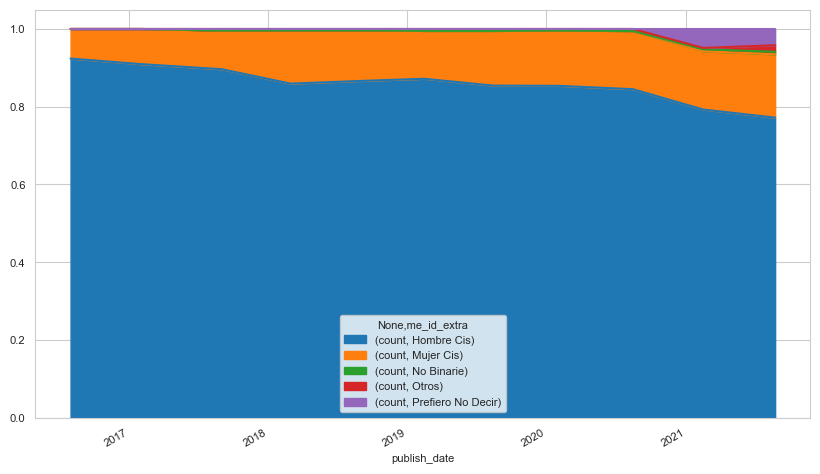

In [19]:
gender_count = (
    dataframe.groupby(["publish_date", "me_id_extra"])
    .me_id_extra.count()
    .rename("count")
    .fillna(0)
    .to_frame()
)
gender_percent = gender_count / gender_count.groupby("publish_date").sum()
display(gender_percent)

gender_percent.unstack("me_id_extra").plot(kind="area")
charts["historic_gender_percent"] = to_rechart(gender_percent)

salary
publish_date me_id_extra                     
2016-08-01   Hombre Cis          20481.927711
             Mujer Cis           18072.289157
2017-02-01   Hombre Cis          24096.385542
             Mujer Cis           21084.337349
2017-09-01   Hombre Cis          32530.120482
             Mujer Cis           30000.000000
             Otros               33734.939759
2018-03-01   Hombre Cis          36144.578313
             Mujer Cis           30000.000000
             Otros               26605.421687
2018-09-04   Hombre Cis          42525.000000
             Mujer Cis           35000.000000
             Otros               34337.349398
2019-02-15   Hombre Cis          50000.000000
             Mujer Cis           42000.000000
             Otros               45000.000000
2019-08-15   Hombre Cis          63000.000000
             Mujer Cis           55000.000000
             Otros               49000.000000
2020-02-02   Hombre Cis          75000.000000
             Mujer Cis           62000.000000
             Otros               56375.000000
2020-08-15   Hombre Cis         100000.000000
             Mujer Cis           83000.000000
             Otros               98000.000000
2021-02-15   Hombre Cis         115000.000000
             Mujer Cis           92000.000000
             No Binarie         117500.000000
             Otros              100000.000000
             Prefiero No Decir  112911.000000
2021-08-23   Hombre Cis         165000.000000
             Mujer Cis          133000.000000
             No Binarie         140000.000000
             Otros              177500.000000
             Prefiero No Decir  160000.000000

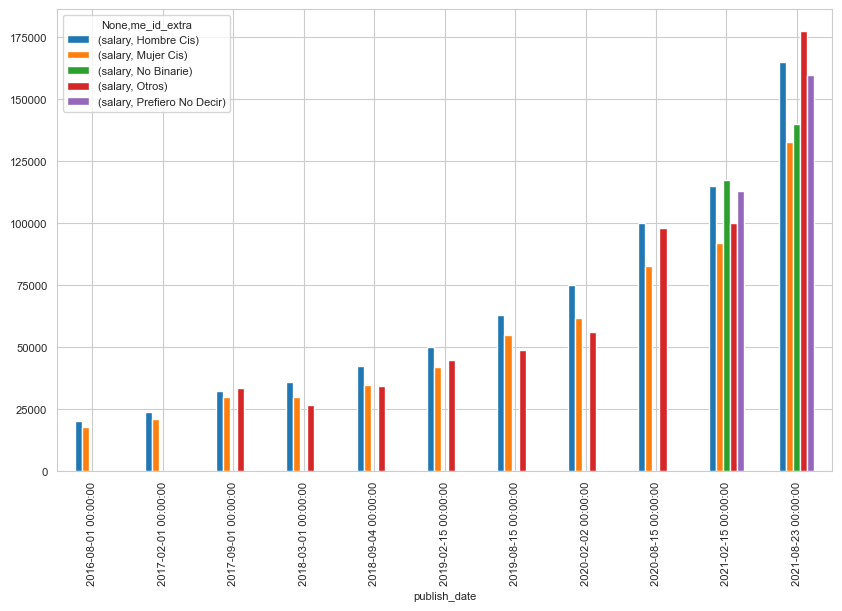

In [20]:
gender_salary_median = (
    dataframe.groupby(["publish_date", "me_id_extra"])
    .salary.median()
    .rename("salary")
    .fillna(0)
    .to_frame()
)
display(gender_salary_median)

gender_salary_median.unstack("me_id_extra").plot(kind="bar")
charts["historic_gender_salary_median"] = to_rechart(gender_salary_median)

En qué areas hay mas mujeres?

In [21]:
sub_data=dataframe.groupby(["role"]).size().sort_values(ascending=False).to_frame()[:25]
sub_data = sub_data.index.tolist()

sub_data_df=dataframe[(dataframe.role.isin(sub_data))]

#data202102=sub_data_df.query('publish_date	 ==  20210810')
##data202102.groupby(['publish_date', 'role','me_id_extra']).size().unstack(fill_value=0)

df=sub_data_df.groupby(['publish_date', 'role','me_id_extra']).size().unstack(fill_value=0)
df['total']=df['Hombre Cis'] + df['Mujer Cis'] + df['No Binarie'] + df['Otros'] + df['Prefiero No Decir']
df = df.div(df["total"], axis=0)
df = df.drop('total',axis=1)

charts["historic_roles_by_gender"] = to_rechart(df)
display(df)

me_id_extra                           Hombre Cis  Mujer Cis  No Binarie  \
publish_date role                                                         
2016-08-01   Architect                  1.000000   0.000000    0.000000   
             Business Analyst           1.000000   0.000000    0.000000   
             Consultant                 1.000000   0.000000    0.000000   
             DBA                        0.896552   0.103448    0.000000   
             Designer                   0.815534   0.184466    0.000000   
...                                          ...        ...         ...   
2021-08-23   Scrum Master               0.710526   0.263158    0.000000   
             Storage / Backup           0.333333   0.333333    0.000000   
             SysAdmin / DevOps / SRE    0.892405   0.037975    0.006329   
             Technical Leader           0.883523   0.062500    0.008523   
             UX                         0.369048   0.583333    0.000000   

me_id_extra                              Otros  Prefiero No Decir  
publish_date role                                                  
2016-08-01   Architect                0.000000           0.000000  
             Business Analyst         0.000000           0.000000  
             Consultant               0.000000           0.000000  
             DBA                      0.000000           0.000000  
             Designer                 0.000000           0.000000  
...                                        ...                ...  
2021-08-23   Scrum Master             0.000000           0.026316  
             Storage / Backup         0.166667           0.166667  
             SysAdmin / DevOps / SRE  0.018987           0.044304  
             Technical Leader         0.014205           0.031250  
             UX                       0.000000           0.047619  

[221 rows x 5 columns]

Que tan conformes están (y estuvieron) las personas respecto a su salario

In [22]:
#df=dataframe.groupby(['publish_date','me_id_extra', 'acquiescence']).size().unstack(fill_value=0)
#df['total']=df[1] + df[2] + df[3] + df[4] + df[5]
#df = df.div(df["total"], axis=0)
#df = df.drop('total',axis=1)

#charts["historic_acquiescence_by_gender"] = to_rechart(df)
#display(df)

## 3. Publicación

In [23]:
import json

json.dumps(charts, allow_nan=False, default=str)

'{"historic_acquiescence_means": {"data": [{"name": "2016-08-01 00:00:00", "Hombre Cis": 2.9777034559643254, "Mujer Cis": 2.706081081081081, "No Binarie": 0.0, "Otros": 0.0, "Prefiero No Decir": 0.0}, {"name": "2017-02-01 00:00:00", "Hombre Cis": 2.4482158398607483, "Mujer Cis": 2.314868804664723, "No Binarie": 0.0, "Otros": 0.0, "Prefiero No Decir": 0.0}, {"name": "2017-09-01 00:00:00", "Hombre Cis": 2.5524193548387095, "Mujer Cis": 2.427350427350427, "No Binarie": 0.0, "Otros": 2.3157894736842106, "Prefiero No Decir": 0.0}, {"name": "2018-03-01 00:00:00", "Hombre Cis": 2.523167649536647, "Mujer Cis": 2.3128295254833042, "No Binarie": 0.0, "Otros": 2.142857142857143, "Prefiero No Decir": 0.0}, {"name": "2018-09-04 00:00:00", "Hombre Cis": 2.586272040302267, "Mujer Cis": 2.4518828451882846, "No Binarie": 0.0, "Otros": 1.8333333333333333, "Prefiero No Decir": 0.0}, {"name": "2019-02-15 00:00:00", "Hombre Cis": 2.5489453758788536, "Mujer Cis": 2.5315487571701722, "No Binarie": 0.0, "Otro

In [ ]:
#import json
#with open('hist_charts.json', 'w', encoding='utf-8') as f:
#    json.dump(charts, f, ensure_ascii=False, indent=4, default=str)

Exportar datos preparados a Google Sheets

In [24]:
#quitamos decimales del salario
df=dataframe.copy()
df['salary'] = df['salary'].astype(int)

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe

gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.create('/content/drive/MyDrive/Colab Notebooks/encuesta_sysarmy/encuesta_hist_clean_202102')

# Open our new sheet and add some data.
worksheet = gc.open('encuesta_hist_clean_202102').sheet1

set_with_dataframe(worksheet, df) 
